# Importar librerias y Dataset

In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import country_converter as coco

In [2]:
path = r"C:\Users\nuc_humbertore\Ironhack\Proyecto\primer_proyecto_DAPT\datos_proyecto\attacks.csv"

In [3]:
#df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

df = pd.read_csv("attacks.csv", encoding ="unicode_escape")

# Limpieza de los datos


## 2.1 limpiar columnas de espacios

In [4]:
# limpiar columnas de espacios

columnas = df.columns
columnas = map(lambda x: x.strip(), columnas)
df.columns = columnas

## 2.2 identificar y eliminar las columnas inservibles

In [5]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [6]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [7]:
df.drop(['Year', 'Type', 'Area', 'Location',
       'Activity', 'Name', 'Injury', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis= 1, inplace=True)

In [8]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)'], dtype='object')

In [9]:
df.shape

(25723, 6)

## 2.2 filas

## Borramos todas las filas con 100% de Nan

In [10]:
df.dropna(how='all',inplace = True)

In [11]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10).index
nul = nulos.sort_values(ascending = False).head(10).index
list(nul)

[25722, 7121, 7128, 7127, 7126, 7125, 7124, 7123, 7122, 7120]

In [12]:
df.shape

(8703, 6)

## borramos los filas con menos de 5 valores que no son Null


In [13]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=4, inplace=True)

In [14]:
df.shape

(6222, 6)

In [15]:
df.describe()

,Case Number,Date,Country,Sex,Age,Fatal (Y/N)
count,6221,6222,6178,5735,3471,5760
unique,6205,5362,211,6,157,8
top,1983.06.15,1957,USA,M,17,N
freq,2,11,2214,5092,154,4292


# 3 Dar formato a los datos

## Nornalizar columna "Fatal (Y/N)"

In [16]:
df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [17]:
#Eliminamos espacios
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Fatal (Y/N)"]=df["Fatal (Y/N)"].str.lower()

#dejamos los "n" y los "y" y transformamos el resto en "notknown"
df.loc[(df.loc[:, "Fatal (Y/N)"] != "n") & (df.loc[:, "Fatal (Y/N)"] != "y")] = "notknown"

In [18]:
df["Fatal (Y/N)"].unique()

array(['n', 'y', 'notknown'], dtype=object)

## Nornalizar columna "Sex"

In [19]:
df["Sex"].unique()

array(['F', 'M', 'notknown', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [20]:
#Eliminamos espacios
df["Sex"] = df["Sex"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Sex"]=df["Sex"].str.lower()

#dejamos las "f" y las "m" y transformamos el resto en "notknown"
df.loc[(df.loc[:, 'Sex'] != "f") & (df.loc[:, 'Sex'] != "m")] = "notknown"

In [21]:
df["Sex"].unique()

array(['f', 'm', 'notknown'], dtype=object)

## Normalizar columna Age a int or float

In [22]:
df["Age"] = df.Age.str.strip()

In [23]:
df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

In [24]:
df["Age_normalize"].fillna(value = 0, inplace=True)

In [25]:
df["Age_normalize"] = df["Age_normalize"].astype(int)

In [26]:
df["Age_normalize"].nunique()

80

array([[<AxesSubplot:title={'center':'Age_normalize'}>]], dtype=object)

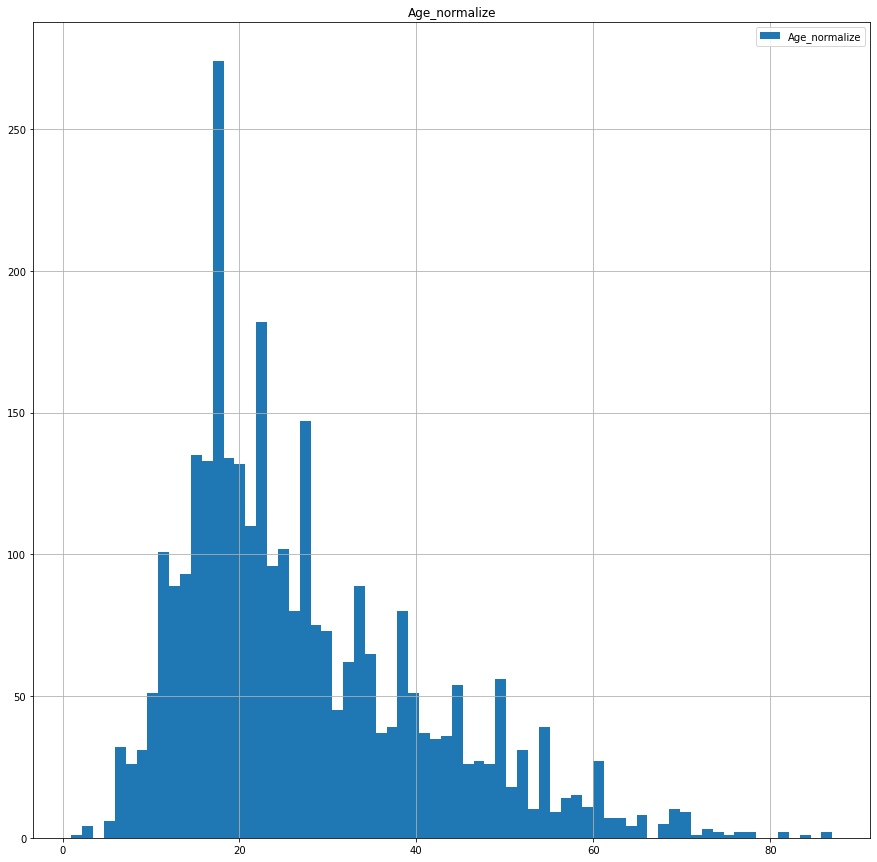

In [27]:
df[df["Age_normalize"] > 0].hist(legend=True,bins=70, figsize = [15,15])

<AxesSubplot:>

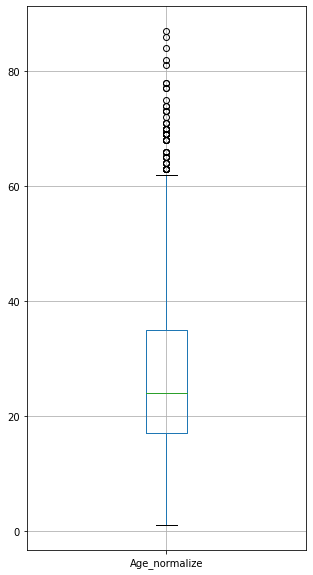

In [28]:
df[df["Age_normalize"] > 0].boxplot(figsize=(5,10))

In [29]:
df[df["Age_normalize"] > 0].describe()

,Age_normalize
count,3112.000000
mean,27.287918
std,13.827193
min,1.000000
25%,17.000000
50%,24.000000
75%,35.000000
max,87.000000


## Normalizar columna Date a datetime

In [30]:
"""
Para normalizar las fechas rellenamos los NaN con una fecha futura para 
después poder excluirla facilmente a la hora de trabajr con los datos
de esa columna

Exclude_date= "2030-01-01 00:00:00"

"""

'\nPara normalizar las fechas rellenamos los NaN con una fecha futura para \ndespués poder excluirla facilmente a la hora de trabajr con los datos\nde esa columna\n\nExclude_date= "2030-01-01 00:00:00"\n\n'

In [31]:
df['Date'].isnull().sum()

0

In [32]:
df['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: Date, Length: 6222, dtype: object

In [33]:
#convertimos Date a datetime para la columna 'Date_normalize'

df['Date_normalize'] = pd.to_datetime(df['Date'], errors ='coerce')

In [34]:
df['Date_normalize'].isnull().sum()

1648

In [35]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [36]:
# Rellenanos los Nan con una fecha rara para poder filtrar luego. 
# OJO! esto convierte toda la columna en float
Exclude_date = "2030-01-01 00:00:00"
df['Date_normalize'].fillna(value = Exclude_date , inplace=True)

In [37]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6222, dtype: datetime64[ns]

In [38]:
df['Date_normalize'].isnull().sum()

0

In [39]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [40]:
#volvemos a convertir la columna de float a datetime 
df['Date_normalize'] = pd.to_datetime(df['Date_normalize'], errors ='coerce')

In [41]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6222, dtype: datetime64[ns]

In [42]:
df['Date_normalize'].isnull().sum()

0

In [43]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [44]:
df['Year_Date'] = df['Date_normalize'].dt.year

In [45]:
df['Year_Date'].isnull().sum()

0

In [46]:
df['Month_Date'] = df['Date_normalize'].dt.month

In [47]:
df['Day_Date'] = df['Date_normalize'].dt.day_name()

In [48]:
df.head(3)

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,USA,f,57,n,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,USA,f,11,n,11,2018-06-18,2018,6,Monday
2,2018.06.09,09-Jun-2018,USA,m,48,n,48,2018-06-09,2018,6,Saturday


In [49]:
df["Year_Date"].nunique()

209

"""
para estudiar / hacer en el futuro:
la manera en que si hay menos valores que x(en cantidad) en una columna esta pase a ser "undefined"
o algo por el estilo. p ej en "Type" aparee Boatomg que es un error de tiping o Questionable que solo hay 2 valores 
"""

In [51]:

"""


df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()



"""


'\n\n\ndf["Country"] = coco.convert(names=df["Country"], to=\'name_short\')\ndf["Country"]=df["Country"].str.lower()\n\n\n\n'

In [52]:
"""


df["Country"].nunique()

"""

'\n\n\ndf["Country"].nunique()\n\n'

<AxesSubplot:>

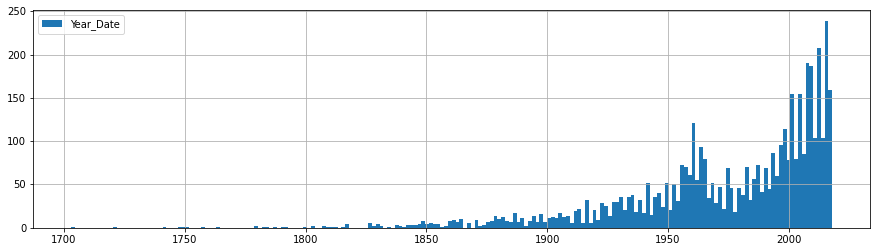

In [53]:
year_filtrado = df[(df.Year_Date < 2028)]
#year_filtrado = df[df["Year_Date"] != Exclude_date]
#Exclude_date



year_filtrado['Year_Date'].hist(legend=True,bins= 200, figsize = [15,4])

In [54]:
type(year_filtrado)

pandas.core.frame.DataFrame

In [55]:
year_filtrado.shape

(4574, 11)

In [56]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age_normalize'}>,
        <AxesSubplot:title={'center':'Date_normalize'}>],
       [<AxesSubplot:title={'center':'Year_Date'}>,
        <AxesSubplot:title={'center':'Month_Date'}>]], dtype=object)

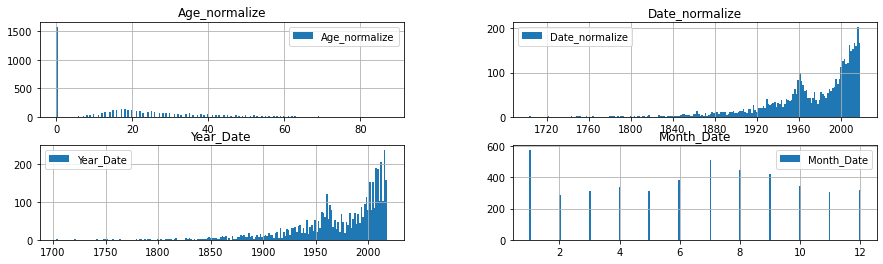

In [57]:
df[df['Year_Date'] != 2030].hist(legend=True,bins= 200, figsize = [15,4])

<AxesSubplot:>

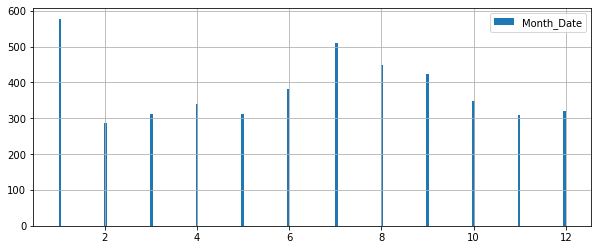

In [58]:
year_filtrado['Month_Date'].hist(legend=True,bins= 200, figsize = [10,4])


<AxesSubplot:>

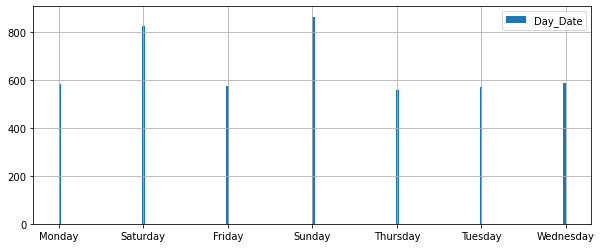

In [59]:
year_filtrado['Day_Date'].hist(legend=True,bins= 200, figsize = [10,4])

In [60]:
df.dtypes

Case Number               object
Date                      object
Country                   object
Sex                       object
Age                       object
Fatal (Y/N)               object
Age_normalize              int32
Date_normalize    datetime64[ns]
Year_Date                  int64
Month_Date                 int64
Day_Date                  object
dtype: object

In [61]:
type(year_filtrado)

# newdf = df[(df.Year_Date != 0)]

pandas.core.frame.DataFrame

<AxesSubplot:>

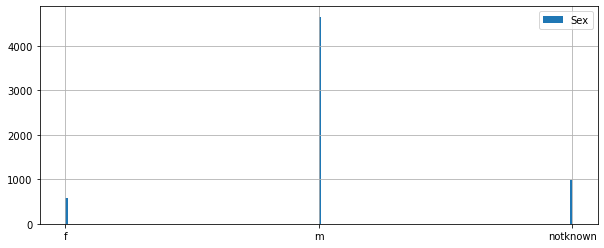

In [62]:
df['Sex'].hist(legend=True,bins= 200, figsize = [10,4])

In [63]:
year_filtrado.sort_values("Year_Date", ascending=True)

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
6160,1703.03.26,26-Mar-1703,BARBADOS,m,19,n,19,1703-03-26,1703,3,Monday
6159,1721.06.00,June 1721,ITALY,m,NaN,y,0,1721-06-01,1721,6,Sunday
6155,1742.12.17,17-Dec-1742,NaN,m,NaN,y,0,1742-12-17,1742,12,Monday
6154,1748.00.00,1748,PANAMA,m,NaN,y,0,1748-01-01,1748,1,Monday
6152,1749.00.00,1749,CUBA,m,14,n,14,1749-01-01,1749,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
30,2018.04.14,14-Apr-2018,BAHAMAS,m,NaN,n,0,2018-04-14,2018,4,Saturday
29,2018.04.15.a,15-Apr-2018,AUSTRALIA,m,37,n,37,2018-04-15,2018,4,Sunday
28,2018.04.15.b,15-Apr-2018,AUSTRALIA,m,41,n,41,2018-04-15,2018,4,Sunday
40,2018.02.23,23-Feb-2018,AUSTRALIA,f,55,n,55,2018-02-23,2018,2,Friday


In [64]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

## Sacar un Df con 2 columnas


In [65]:
year_filtrado[['Year_Date','Age_normalize']].describe()

,Year_Date,Age_normalize
count,4574.000000,4574.000000
mean,1974.055969,17.911893
std,42.055267,17.164462
min,1703.000000,0.000000
25%,1955.000000,0.000000
50%,1988.000000,17.000000
75%,2007.000000,28.000000
max,2018.000000,87.000000


filtrado de columnasplot

In [66]:
#filtrar solo a los hombres
df[df["Sex"] == "m"]

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
2,2018.06.09,09-Jun-2018,USA,m,48,n,48,2018-06-09,2018,6,Saturday
3,2018.06.08,08-Jun-2018,AUSTRALIA,m,NaN,n,0,2018-06-08,2018,6,Friday
4,2018.06.04,04-Jun-2018,MEXICO,m,NaN,n,0,2018-06-04,2018,6,Monday
5,2018.06.03.b,03-Jun-2018,AUSTRALIA,m,NaN,n,0,2018-06-03,2018,6,Sunday
6,2018.06.03.a,03-Jun-2018,BRAZIL,m,18,y,18,2018-06-03,2018,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,AUSTRALIA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6298,ND.0004,Before 1903,AUSTRALIA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6299,ND.0003,1900-1905,USA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6300,ND.0002,1883-1889,PANAMA,m,NaN,y,0,2030-01-01,2030,1,Tuesday


# pruebas


In [67]:
df_numerical = df.select_dtypes(include = ["float64", "int64"]) #o np.number, o "number"
df_numerical

,Year_Date,Month_Date
0,2018,6
1,2018,6
2,2018,6
3,2018,6
4,2018,6
...,...,...
6297,2030,1
6298,2030,1
6299,2030,1
6300,2030,1


<AxesSubplot:xlabel='Year_Date', ylabel='Month_Date'>

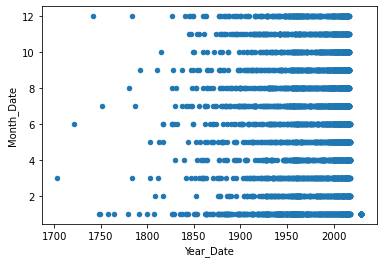

In [68]:
df_numerical.plot(x = "Year_Date", y = "Month_Date", kind = "scatter")

In [69]:
df[df["Sex == "f"]].plot(x ="Year_Date" , y = "Age_normalize", kind = "scatter")

SyntaxError: invalid syntax (2271129756.py, line 1)

In [70]:
Mujeres = df[df['Sex'] == "f"]

In [71]:
Mujeres.head()

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,USA,f,57,n,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,USA,f,11,n,11,2018-06-18,2018,6,Monday
14,2018.05.00,May 2018,AUSTRALIA,f,34,n,34,2018-05-01,2018,5,Tuesday
40,2018.02.23,23-Feb-2018,AUSTRALIA,f,55,n,55,2018-02-23,2018,2,Friday
43,2018.02.14,14-Feb-2018,AUSTRALIA,f,NaN,n,0,2018-02-14,2018,2,Wednesday


In [72]:
sns.histplot(data=df, x="Fatal (Y/N)", alpha=0.5)


NameError: name 'sns' is not defined

In [ ]:
df.columns

In [73]:
df.dtypes

Case Number               object
Date                      object
Country                   object
Sex                       object
Age                       object
Fatal (Y/N)               object
Age_normalize              int32
Date_normalize    datetime64[ns]
Year_Date                  int64
Month_Date                 int64
Day_Date                  object
dtype: object

In [74]:
# df[df["Age_normalize"] > 0]

In [75]:
df['Sex'].value_counts()

m           4655
notknown     992
f            575
Name: Sex, dtype: int64

In [76]:
df['Fatal (Y/N)'].value_counts()

n           3950
y           1280
notknown     992
Name: Fatal (Y/N), dtype: int64

In [77]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

In [78]:
df["Fatal (Y/N)"].value_counts()

n           3950
y           1280
notknown     992
Name: Fatal (Y/N), dtype: int64

<AxesSubplot:>

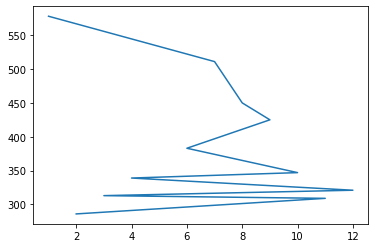

In [79]:
year_filtrado["Month_Date"].value_counts().plot()

<AxesSubplot:>

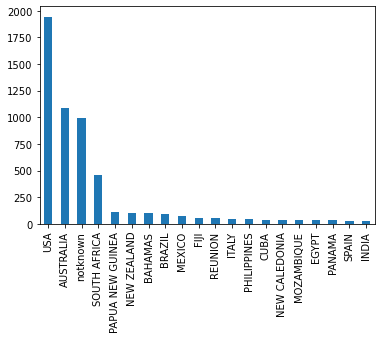

In [80]:
df["Country"].value_counts().nlargest(20).plot.bar()

In [81]:
df["Country"].info()

<class 'pandas.core.series.Series'>
Int64Index: 6222 entries, 0 to 6301
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
6183 non-null   object
dtypes: object(1)
memory usage: 97.2+ KB


In [82]:
pd.set_option('display.max_rows', 10)

In [83]:
"""


import country_converter as coco

df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()
df["Country"].value_counts()

"""


'\n\n\nimport country_converter as coco\n\ndf["Country"] = coco.convert(names=df["Country"], to=\'name_short\')\ndf["Country"]=df["Country"].str.lower()\ndf["Country"].value_counts()\n\n'

In [84]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

<AxesSubplot:>

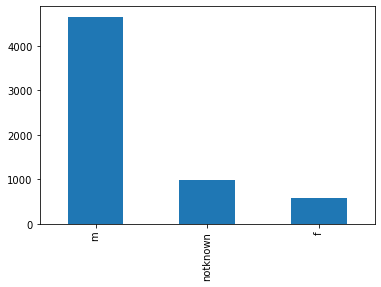

In [85]:
df.Sex.value_counts().plot(kind='bar')

In [86]:
df.Type.value_counts().plot(kind='bar')

AttributeError: 'DataFrame' object has no attribute 'Type'

In [ ]:
df.reset_index().plot(
    x="index", y=["Month_Date", "Month_Date"], kind="bar"
)
plt.title("Mince Pie Consumption 18/19")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")

In [ ]:
df["Year_Date"].nunique()

In [ ]:
df.columns


In [87]:
sexo_muertes = df[['Sex','Fatal (Y/N)']]

In [88]:
sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

Sex       Fatal (Y/N)
m         n              3482
          y              1173
notknown  notknown        992
f         n               468
          y               107
dtype: int64

In [89]:
sexo_muertes.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301],
           dtype='int64', length=6222)

In [90]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

Text(0, 0.5, 'Cantidad')

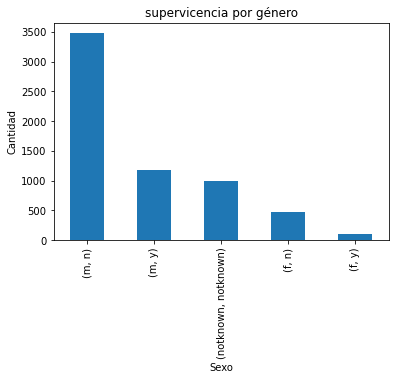

In [91]:
from matplotlib import pyplot as plt
plotdata = sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

plotdata.plot(kind="bar")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

In [92]:
Mujeres = df[df['Sex'] == "f"]

In [93]:
df.value_counts("Sex")

Sex
m           4655
notknown     992
f            575
dtype: int64

In [94]:
Mujeres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    468
y    107
dtype: int64

In [95]:
Hombres = df[df['Sex'] == "m"]

In [96]:
df.value_counts("Sex")

Sex
m           4655
notknown     992
f            575
dtype: int64

In [97]:
Hombres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    3482
y    1173
dtype: int64

Text(0, 0.5, 'Cantidad')

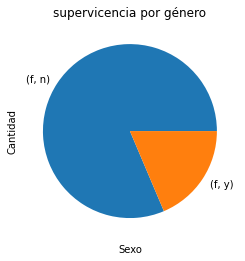

In [98]:
from matplotlib import pyplot as plt
plotdata = Mujeres.value_counts(['Sex','Fatal (Y/N)'])



plotdata.plot(kind="pie")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

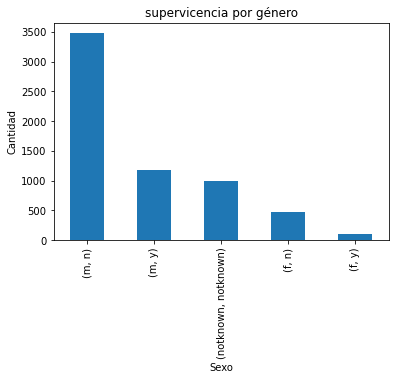

In [99]:
from matplotlib import pyplot as plt
plotdata = sexo_muertes.value_counts(['Sex','Fatal (Y/N)'])

plotdata.plot(kind="bar")
plt.title("supervicencia por género")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")

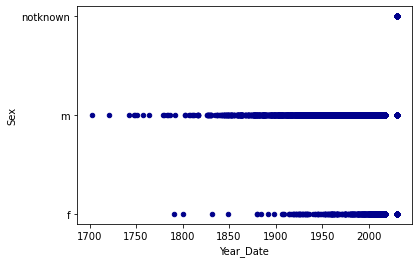

In [100]:
"""
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],

                   [6.4, 3.2, 1], [5.9, 3.0, 2]],

                  columns=['length', 'width', 'species'])
"""
ax1 = df.plot.scatter(x='Year_Date',

                      y='Sex',

                     c='DarkBlue')

In [101]:
"""
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],

                   [6.4, 3.2, 1], [5.9, 3.0, 2]],

                  columns=['length', 'width', 'species'])
"""
bx1 = df.plot.scatter(x='Year_Date',

                      y='Age_normalize',

                     c='DarkBlue'
                     s=400)

SyntaxError: invalid syntax (2600923550.py, line 13)

# Ubicaciones por paises

In [ ]:
import country_converter as coco

df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()
df["Country"].value_counts()

In [ ]:
df["Year_Date"]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
attacks = sns.load_dataset("attacks")
attacks = attacks.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
df["Year_Date"]

In [ ]:
def convertir (x):
    for i in x:
        if i < 1750:
            i="1750" 
        elif 1750<i<1800:
            i= "1800"
        elif 1800<i<1850:
            i= "1850"
        elif 1850<i<1900:
            i="1900"
        elif 1900<i<1950:
            i= "1950"
        elif 1950<i<1975:
            i="decada 1950-1975"

In [ ]:
df[(df["Year_Date"] > 1990) & (df["Year_Date"]<2030)].Year_Date.hist(legend=True,bins=28, figsize = [15,4])

In [ ]:
df[(df["Year_Date"]<2030)].Year_Date.hist(legend=True,bins=28, figsize = [15,4])

In [ ]:
df5=df[(df["Year_Date"]<2030)].Year_Date.hist(legend=True,bins=28, figsize = [15,4])
df["Year_Date"].plot(kind="hist", log=True)

In [ ]:
df.info()

In [ ]:
#correlaciones entre variables 


In [ ]:
df["Country"].value_counts().nlargest(10).plot.bar()


In [ ]:

df.Activity

In [ ]:
#Contar cuanto representa a sobre b de los 10 principales 
a= df["Country"].value_counts().nlargest(10).sum()
b= df["Country"].value_counts().sum()
#df["Country"]="not found"].value_counts().sum()

#c= a/b
a/b


In [ ]:
df

In [ ]:
southern=["australia", "south africa", "papua new guinea", "brazil", "fiji", "reunion", "philippines", "new caledonia", "new zealand","indonesia", "solomon islands", "french polynesia"]

northern= ["united states", "mexico", "spain", "italy", "panama", "egypt", "japan", "hong kong", "jamaica", "greece", "croatia", "india"]

In [ ]:
df_trabajo = df[['Sex','Fatal (Y/N)', 'Date_normalize', 'Year_Date', 'Month_Date','Country','Day_Date', 'Age_normalize',"Type"]]
df_trabajo

,Sex,Fatal (Y/N),Date_normalize,Year_Date,Month_Date,Country,Day_Date,Age_normalize,Type
0,f,n,2018-06-25,2018,6,united states,Monday,57,Boating
1,f,n,2018-06-18,2018,6,united states,Monday,11,Unprovoked
2,m,n,2018-06-09,2018,6,united states,Saturday,48,Invalid
3,m,n,2018-06-08,2018,6,australia,Friday,0,Unprovoked
4,m,n,2018-06-04,2018,6,mexico,Monday,0,Provoked
...,...,...,...,...,...,...,...,...,...
6297,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6298,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6299,m,y,2030-01-01,2030,1,united states,Tuesday,0,Unprovoked
6300,m,y,2030-01-01,2030,1,panama,Tuesday,0,Unprovoked


In [ ]:
df_trabajo[(df_trabajo["Day_Date"]) & (df_trabajo["Country"]!="not found")].value_counts().plot.bar()

TypeError: unsupported operand type(s) for &: 'str' and 'bool'

In [ ]:
t=df_trabajo[df_trabajo["Country"]=="not found"].value_counts().sum()
ar=df_trabajo["Country"].value_counts().sum()
t/ar

0.19834973024436686

<AxesSubplot:>

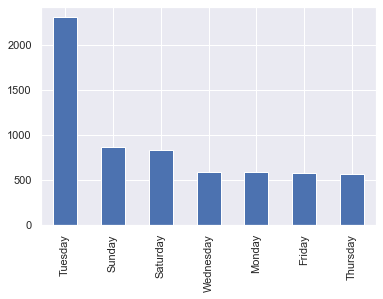

In [ ]:
#df_trabajo["Country"].value_counts().nlargest(10).plot.bar()
#df_trabajo["Country"].value_counts().plot.bar()
df_trabajo["Day_Date"].value_counts().plot.bar()


In [ ]:
df_trabajo

,Sex,Fatal (Y/N),Date_normalize,Year_Date,Month_Date,Country,Day_Date,Age_normalize,Type
0,f,n,2018-06-25,2018,6,united states,Monday,57,Boating
1,f,n,2018-06-18,2018,6,united states,Monday,11,Unprovoked
2,m,n,2018-06-09,2018,6,united states,Saturday,48,Invalid
3,m,n,2018-06-08,2018,6,australia,Friday,0,Unprovoked
4,m,n,2018-06-04,2018,6,mexico,Monday,0,Provoked
...,...,...,...,...,...,...,...,...,...
6297,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6298,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6299,m,y,2030-01-01,2030,1,united states,Tuesday,0,Unprovoked
6300,m,y,2030-01-01,2030,1,panama,Tuesday,0,Unprovoked


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

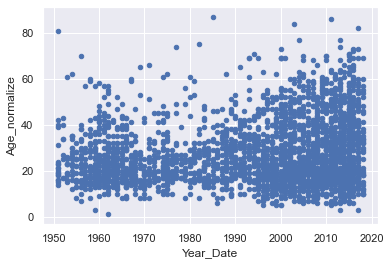

In [ ]:
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] > 1950)].plot.scatter(x="Year_Date", y="Age_normalize")

#df_trabajo2= df_trabajo[["Age_normalize">"0"]]
#df_trabajo3= df_trabajo2[["Year_Date"]<"2030"]
#df_trabajo.plot.scatter(x="Year_Date", y="Age_normalize")

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

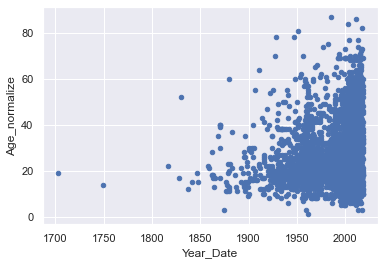

In [ ]:
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0)].plot.scatter(x="Year_Date", y="Age_normalize")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

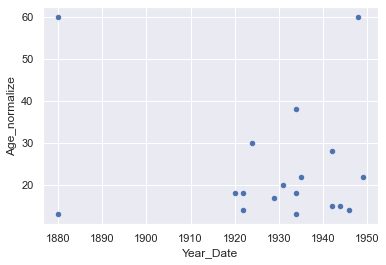

In [ ]:
#df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] < 1950)].plot.scatter(x="Year_Date", y="Age_normalize")
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] < 1950)& (df_trabajo["Sex"] == "f")].plot.scatter(x="Year_Date", y="Age_normalize")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

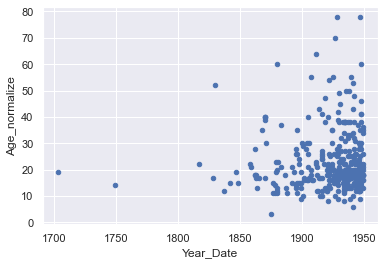

In [ ]:
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] < 1950)].plot.scatter(x="Year_Date", y="Age_normalize")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

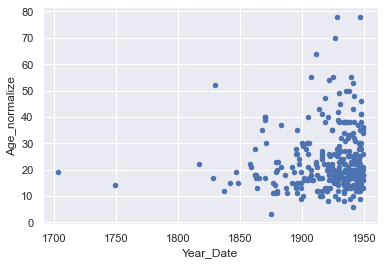

In [ ]:
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] < 1950)& (df_trabajo["Year_Date"] < 1950)& (df_trabajo["Sex"] == "m")].plot.scatter(x="Year_Date", y="Age_normalize")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

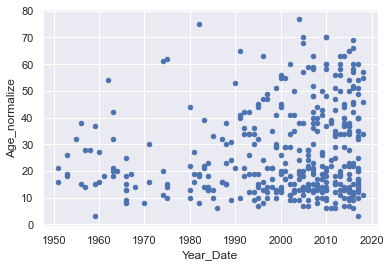

In [ ]:
# Dispersión de edad por Mujeres

df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] > 1950)& (df_trabajo["Sex"] == "f")].plot.scatter(x="Year_Date", y="Age_normalize")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Year_Date', ylabel='Age_normalize'>

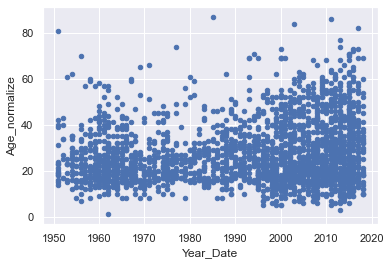

In [ ]:
#hombres edad con distribución anual
df_trabajo[(df_trabajo["Year_Date"] < 2030) & (df_trabajo["Age_normalize"] > 0) & (df_trabajo["Year_Date"] > 1950)& (df_trabajo["Sex"] == "m")].plot.scatter(x="Year_Date", y="Age_normalize")


In [ ]:
southern=["australia", "south africa", "papua new guinea", "brazil", "fiji", "reunion", "philippines", "new caledonia", "new zealand","indonesia", "solomon islands", "french polynesia"]
#df["Country"].value_counts().sum()
df.Country.isin(southern).value_counts

In [ ]:
df_south1= df_trabajo[((df_trabajo["Country"]=="australia") | (df_trabajo["Country"]=="south africa")) | (df_trabajo["Country"]=="papua new guinea")]
df_south2= df_south1[df_south1["Year_Date"]<2030]
df_south2["Day_Date"].value_counts().plot.bar()

In [ ]:
df_south2["Month_Date"].value_counts()

In [ ]:
df_south2["Month_Date"].value_counts().sort_index().plot.bar()

In [ ]:
meses=[1,2,11,12]
rsl2 = df_south2[df_south2['Month_Date'].isin(meses)]
f= rsl2.value_counts().sum()
d=df_south2.value_counts().sum()
f/d

In [ ]:
df_north1= df[((df["Country"]=="united states") | (df["Country"]=="bahamas")) | (df["Country"]=="mexico")]
df_north2= df_north1[df_north1["Year_Date"]<2030]
df_north2["Day_Date"].value_counts().plot.bar()

In [ ]:
df_north2["Month_Date"].value_counts().sort_index().plot.bar()

NameError: ignored

In [ ]:
meses=[6,7,8,9]

d=df_north2.value_counts().sum()
df_north2.isin(meses).value_counts().sum()
#df_north2[["Month_Date"],meses ].value_counts()
#value_list = ["apple"]
#boolean_series = df.fruit.isin(value_list)
#filtered_df = df[boolean_series]

In [ ]:
meses=[6,7,8,9]
rsl = df_north2[df_north2['Month_Date'].isin(meses)]
f= rsl.value_counts().sum()
d=df_north2.value_counts().sum()
#De ataques que ocurren en 4 meses en el hemisferio norte 
f/d

In [ ]:
df.loc[0]

Case Number                        2018.06.25
Date                              25-Jun-2018
Year                                   2018.0
Type                                  Boating
Country                         united states
Area                               California
Location          Oceanside, San Diego County
Activity                             Paddling
Sex                                         f
Age                                        57
Fatal (Y/N)                                 n
Time                                    18h00
original order                         6303.0
Age_normalize                              57
Date_normalize            2018-06-25 00:00:00
Year_Date                                2018
Month_Date                                  6
Day_Date                               Monday
Name: 0, dtype: object

In [ ]:
#rsl.plot.pie(y='Day_Date', title="Title", legend=False, autopct='%1.1f%%', explode=(0, 0, 0.1),shadow=True, startangle=0
            
rsl.groupby(['Day_Date']).sum().plot(kind='pie' y="") 

SyntaxError: ignored

In [ ]:
df_north3= df_north2.sort_values(by='Month_Date', ascending=True).sort_index()
df_north3["Month_Date"].value_counts().sort_index().plot.bar()

In [ ]:
df2 = df.groupby(['Name', 'Abuse/NFF'])['Name'].count().unstack('Abuse/NFF').fillna(0)
df2[['abuse','nff']].plot(kind='bar', stacked=True)

In [ ]:
df_trabajo["Sex"].unique()

array(['f', 'm', 'notknown'], dtype=object)

In [ ]:
#df_trabajo2=df_trabajo[(df_trabajo["Sex"]=="f")&(df_trabajo["Sex"]=="m")]

df_trabajo[(df_trabajo["Sex"]!="notknown")]
df_trabajo["Sex"].unique()

array(['f', 'm', 'notknown'], dtype=object)

<AxesSubplot:xlabel='Fatal (Y/N)'>

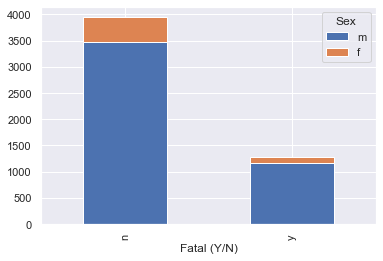

In [ ]:
#Stacked Male and female como de fatal es 

df2 = df_trabajo.groupby(['Sex', 'Fatal (Y/N)'])['Fatal (Y/N)'].count().unstack('Sex').fillna(0)
df2.drop("notknown", inplace=True)
df2.drop(labels="notknown", axis=1, inplace=True)
#(labels="deathes", axis=1)
df2[['m','f']].plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Fatal (Y/N)'>

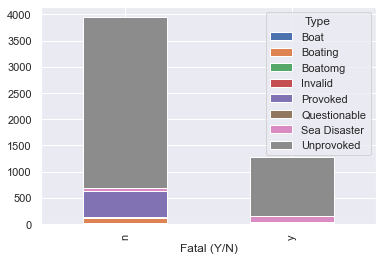

In [ ]:
#Stacked Male and female como de fatal es 

df4 = df_trabajo.groupby(['Type', 'Fatal (Y/N)'])['Fatal (Y/N)'].count().unstack('Type').fillna(0)
df4.drop("notknown", inplace=True)
df4.drop(labels="notknown", axis=1, inplace=True)
#(labels="deathes", axis=1)
df4.plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='Type'>

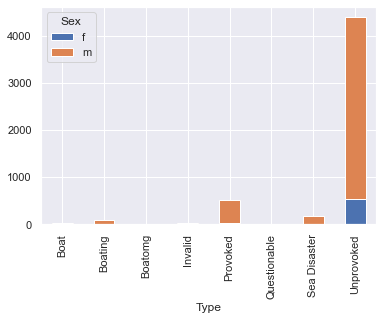

In [ ]:
df4 = df_trabajo.groupby(['Sex', 'Type'])['Type'].count().unstack('Sex').fillna(0)
df4.drop("notknown", inplace=True)
df4.drop(labels="notknown", axis=1, inplace=True)
#(labels="deathes", axis=1)
df4.plot(kind='bar', stacked=True)

In [ ]:
df_trabajo

,Sex,Fatal (Y/N),Date_normalize,Year_Date,Month_Date,Country,Day_Date,Age_normalize,Type
0,f,n,2018-06-25,2018,6,united states,Monday,57,Boating
1,f,n,2018-06-18,2018,6,united states,Monday,11,Unprovoked
2,m,n,2018-06-09,2018,6,united states,Saturday,48,Invalid
3,m,n,2018-06-08,2018,6,australia,Friday,0,Unprovoked
4,m,n,2018-06-04,2018,6,mexico,Monday,0,Provoked
...,...,...,...,...,...,...,...,...,...
6297,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6298,m,y,2030-01-01,2030,1,australia,Tuesday,0,Unprovoked
6299,m,y,2030-01-01,2030,1,united states,Tuesday,0,Unprovoked
6300,m,y,2030-01-01,2030,1,panama,Tuesday,0,Unprovoked


<AxesSubplot:xlabel='Year_Date'>

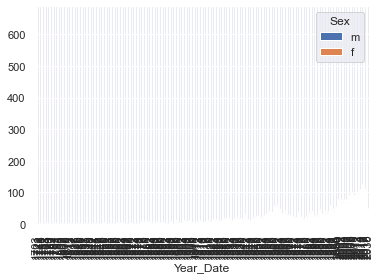

In [ ]:

# Información sobre año y sexo 

df3 = df_trabajo.groupby(['Sex', 'Year_Date'])['Year_Date'].count().unstack('Sex').fillna(0)
#df2.drop("notknown", inplace=True)
#df2.drop(labels="notknown", axis=1, inplace=True)
#(labels="deathes", axis=1)
df3[['m','f']].plot(kind='bar', stacked=True)

In [ ]:
pivot = pd.pivot_table(data=df, index=['Sex'], columns=['Fatal (Y/N)'], values=("Sex"), aggfunc="count")

ValueError: Grouper for 'Sex' not 1-dimensional

In [ ]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),Time,original order,Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,2018.0,Boating,united states,California,"Oceanside, San Diego County",Paddling,f,57,n,18h00,6303.0,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,united states,Georgia,"St. Simon Island, Glynn County",Standing,f,11,n,14h00 -15h00,6302.0,11,2018-06-18,2018,6,Monday
2,2018.06.09,09-Jun-2018,2018.0,Invalid,united states,Hawaii,"Habush, Oahu",Surfing,m,48,n,07h45,6301.0,48,2018-06-09,2018,6,Saturday
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,m,NaN,n,NaN,6300.0,0,2018-06-08,2018,6,Friday
4,2018.06.04,04-Jun-2018,2018.0,Provoked,mexico,Colima,La Ticla,Free diving,m,NaN,n,NaN,6299.0,0,2018-06-04,2018,6,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,australia,Western Australia,Roebuck Bay,Diving,m,NaN,y,NaN,6.0,0,2030-01-01,2030,1,Tuesday
6298,ND.0004,Before 1903,0.0,Unprovoked,australia,Western Australia,NaN,Pearl diving,m,NaN,y,NaN,5.0,0,2030-01-01,2030,1,Tuesday
6299,ND.0003,1900-1905,0.0,Unprovoked,united states,North Carolina,Ocracoke Inlet,Swimming,m,NaN,y,NaN,4.0,0,2030-01-01,2030,1,Tuesday
6300,ND.0002,1883-1889,0.0,Unprovoked,panama,NaN,"Panama Bay 8ºN, 79ºW",NaN,m,NaN,y,NaN,3.0,0,2030-01-01,2030,1,Tuesday


In [ ]:
df.groupby("Sex").agg("Fatal (Y/N)":["count"])

SyntaxError: invalid syntax (1028444526.py, line 1)

In [ ]:
#Fish consumption per country and year
df15 = pd.read_csv(r"/Users/luis.florit/Documents/Ironhackdev/Proyecto 1/fish-and-seafood-consumption-per-capita.csv", encoding ="unicode_escape")



TypeError: lower() got an unexpected keyword argument 'inplace'

In [ ]:
df15

,Entity,Code,Year,"Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)"
0,Afghanistan,AFG,1961,0.03
1,Afghanistan,AFG,1962,0.03
2,Afghanistan,AFG,1963,0.03
3,Afghanistan,AFG,1964,0.03
4,Afghanistan,AFG,1965,0.03
...,...,...,...,...
11023,Zimbabwe,ZWE,2013,2.82
11024,Zimbabwe,ZWE,2014,3.39
11025,Zimbabwe,ZWE,2015,3.82
11026,Zimbabwe,ZWE,2016,3.79


In [ ]:
df15.rename(columns = {'Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)':'kg'}, inplace = True)
df15.rename(columns = {'Entity':'Country'}, inplace = True)

df15["Country"]=df15["Country"].str.lower()
df15

,Country,Code,Year,kg
0,afghanistan,AFG,1961,0.03
1,afghanistan,AFG,1962,0.03
2,afghanistan,AFG,1963,0.03
3,afghanistan,AFG,1964,0.03
4,afghanistan,AFG,1965,0.03
...,...,...,...,...
11023,zimbabwe,ZWE,2013,2.82
11024,zimbabwe,ZWE,2014,3.39
11025,zimbabwe,ZWE,2015,3.82
11026,zimbabwe,ZWE,2016,3.79


In [ ]:
df15.groupby(by=["Country"], dropna=False).sum().nlargest(10).plot.bar()
#df15["Country"].sum().nlargest(10).plot.bar()


TypeError: nlargest() missing 1 required positional argument: 'columns'